<a href="https://colab.research.google.com/github/sabithakrishnan/VideoProcessing/blob/main/facerecognition_tenderd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import dlib
import glob
features_finalised=[]
# get the path/directory
folder_dir = '/content/drive/MyDrive/facerecognitionimages'

# iterate over files in
# that directory
for images in glob.iglob(f'{folder_dir}/*'):

    # check if the image ends with png
    if (images.endswith(".jpg")):
        img= cv2.imread(images)
        hog_face_detector = dlib.get_frontal_face_detector()
    def hogDetectFaces(image, hog_face_detector, display = True):
            height, width, _ = image.shape
            output_image = image.copy()
            imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hog_face_detector(imgRGB, 0)
            for bbox in results:
                x1 = bbox.left()
                y1 = bbox.top()
                x2 = bbox.right()
                y2 = bbox.bottom()

            cropped_image = imgRGB[x1:x2, y1:y2]


            return cropped_image
    output=hogDetectFaces(img, hog_face_detector, display=True)
    grayimg = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(grayimg)
    import numpy as np
    import os
    import skimage.feature as feature
    graycom = feature.graycomatrix(equ, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
    contrast = feature.graycoprops(graycom, 'contrast')
    dissimilarity = feature.graycoprops(graycom, 'dissimilarity')
    homogeneity = feature.graycoprops(graycom, 'homogeneity')
    energy = feature.graycoprops(graycom, 'energy')
    correlation = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')
    features=[max(max(contrast)), max(max(dissimilarity)), max(max(homogeneity)), max(max(energy)), max(max(correlation)), max(max(ASM))]
    features_finalised.append(features)
x=features_finalised
y=[1,1,1,1,1,0,0,0,0,0]
from sklearn.svm import SVC
clf = SVC(C=1000, gamma=5)

# fitting x samples and y classes
clf.fit(x,y)
import pickle
model_pkl_file = "facetrainingmodel.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(clf, file)





[0]


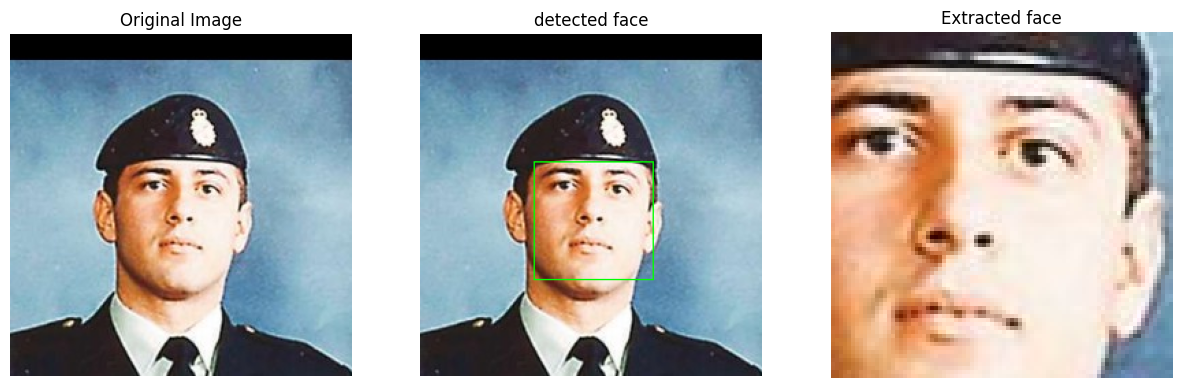

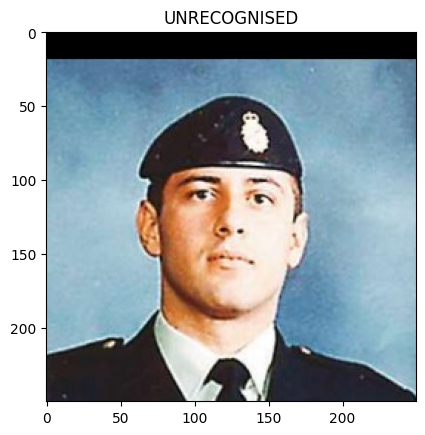

In [ ]:
import time
import pickle
import matplotlib.pyplot as plt
import dlib
import cv2
files=open("/content/drive/MyDrive/facetrainingmodel.pkl",'rb')
model = pickle.load(files)
hog_face_detector = dlib.get_frontal_face_detector()
def hogDetectFaces(image, hog_face_detector, display = True):

            height, width, _ = image.shape

            output_image = image.copy()

            imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            results = hog_face_detector(imgRGB, 0)

            for bbox in results:

                x1 = bbox.left()
                y1 = bbox.top()
                x2 = bbox.right()
                y2 = bbox.bottom()
                cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)
                #cv2.putText(output_image, org=(10, 65),fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)

                plt.figure(figsize=[15,15])
                plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
                plt.subplot(132);plt.imshow(output_image[:,:,::-1]);plt.title("detected face");plt.axis('off');
            cropped_image = imgRGB[x1:x2, y1:y2]
            plt.subplot(133);plt.imshow(cropped_image);plt.title("Extracted face");plt.axis('off');



            return cropped_image
image = cv2.imread('/content/drive/MyDrive/facerecognitionimages/Nathan_Smith_0001.jpg')

output=hogDetectFaces(image, hog_face_detector, display=True)
grayimg = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(grayimg)
import numpy as np
import skimage.feature as feature
graycom = feature.graycomatrix(equ, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
contrast = feature.graycoprops(graycom, 'contrast')
dissimilarity = feature.graycoprops(graycom, 'dissimilarity')
homogeneity = feature.graycoprops(graycom, 'homogeneity')
energy = feature.graycoprops(graycom, 'energy')
correlation = feature.graycoprops(graycom, 'correlation')
ASM = feature.graycoprops(graycom, 'ASM')
features=[max(max(contrast)), max(max(dissimilarity)), max(max(homogeneity)), max(max(energy)), max(max(correlation)), max(max(ASM))]
op=model.predict([features])
print(op)
plt.figure()
plt.imshow(image[:,:,::-1])
if op==1:
  plt.title('RECOGNISED')
else:
  plt.title('UNRECOGNISED')
